In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load data 
df = pd.read_csv("D:\\MajorProject\\Datasets_1\\Final Dataset1\\Dataset2New1_Reliance Industries Ltd.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,GDP Growth Rate,Interest Rate,Inflation Rate
0,2008-01-01,715.715759,717.944580,702.119629,705.376221,630.190979,4864461.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
1,2008-01-02,707.047913,714.229797,696.225464,708.719543,633.178162,12588005.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
2,2008-01-03,706.304932,725.621826,700.918518,719.108582,642.459778,13939233.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
3,2008-01-04,719.182861,747.861023,719.182861,741.223938,662.217773,16366255.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
4,2008-01-07,736.716675,750.387085,733.051392,747.972473,668.247131,12650730.0,Reliance Industries Ltd,2008,3.1,3.8,8.3


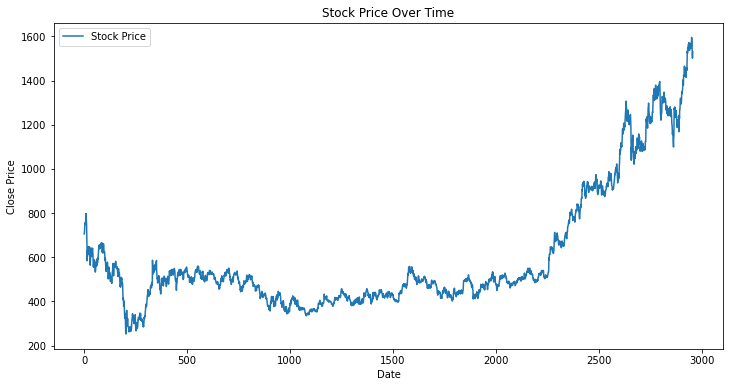

In [5]:
# EDA
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Stock Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


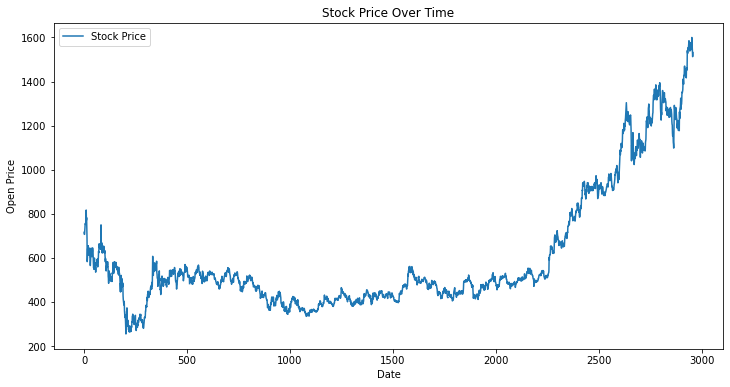

In [6]:
# EDA
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label='Stock Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

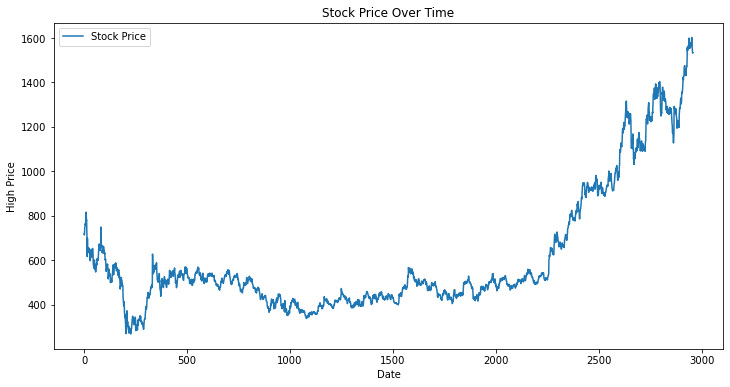

In [8]:
# EDA
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label='Stock Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()
plt.show()

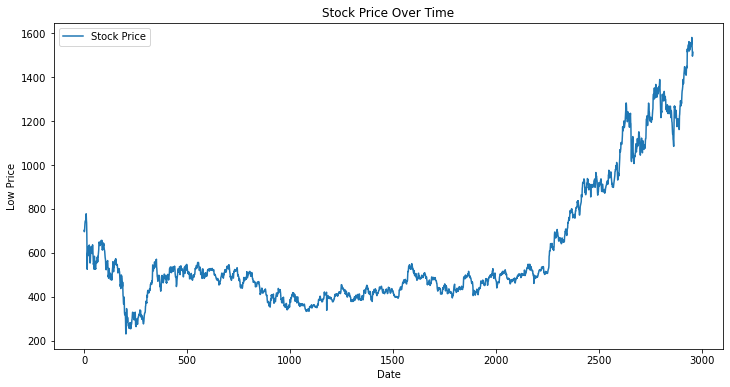

In [9]:
# EDA
plt.figure(figsize=(12, 6))
plt.plot(df['Low'], label='Stock Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend()
plt.show()

In [11]:
# ARIMA Model
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# ARIMA model fitting (example values, adjust as needed)
arima_model = ARIMA(train['Close'], order=(1, 1, 1))
arima_fit = arima_model.fit()

# Model evaluation
predictions = arima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

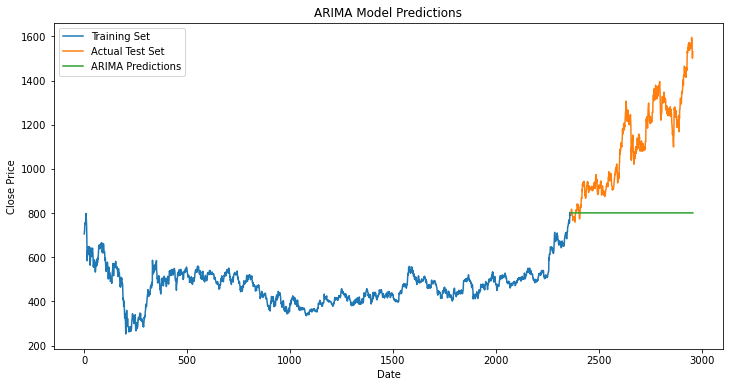

In [12]:
# Plotting predictions against actual values
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Training Set')
plt.plot(test['Close'], label='Actual Test Set')
plt.plot(predictions, label='ARIMA Predictions')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'test' contains the actual values and 'predictions' contains the predicted values
actual_values = test['Close'].values
predicted_values = predictions.values

# Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error (MSE): 140248.62844202324
Mean Absolute Error (MAE): 315.36925244655896
Root Mean Squared Error (RMSE): 374.49783502982126


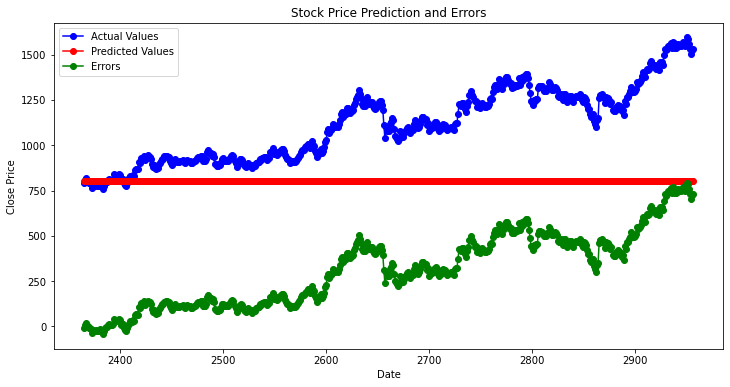

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'test' contains the actual values and 'predictions' contains the predicted values
actual_values = test['Close'].values
predicted_values = predictions.values

# Calculate errors
errors = actual_values - predicted_values

# Plotting predictions against actual values
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(test.index, actual_values, label='Actual Values', color='blue', marker='o')

# Plot predicted values
plt.plot(test.index, predicted_values, label='Predicted Values', color='red', marker='o')

# Plot errors
plt.plot(test.index, errors, label='Errors', color='green', marker='o')

plt.title('Stock Price Prediction and Errors')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


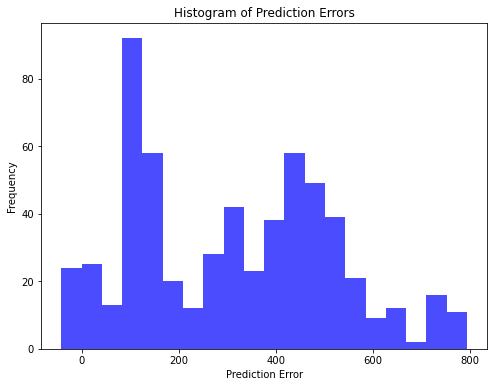

In [16]:
# Plotting histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


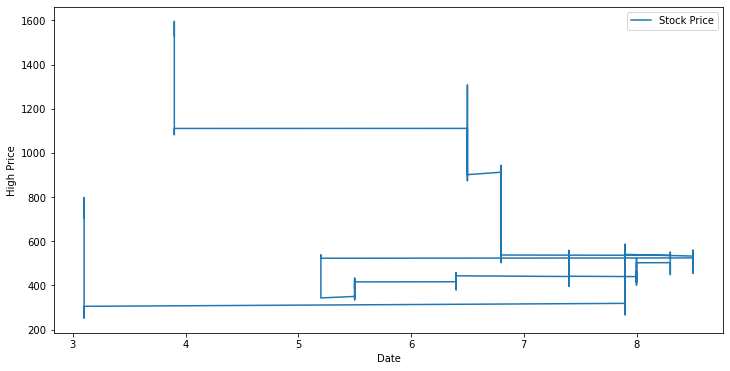

In [18]:
# EDA
plt.figure(figsize=(12, 6))
plt.plot(df['GDP Growth Rate'], df['Close'], label='Stock Price')
# plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()
plt.show()

# AIC USE

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from itertools import product


# Load your time series data (replace 'your_data.csv' with the actual file path)
df = pd.read_csv('../Datasets_1/Training Dataset/Reliance_Industries_Ltd.csv')


# Define a function to perform ARIMA grid search and return the best model
def arima_grid_search(data, p_values, d_values, q_values):
    best_aic = np.inf
    best_order = None


    for p, d, q in product(p_values, d_values, q_values):
        order = (p, d, q)
        try:
            model = ARIMA(data, order=order)
            results = model.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_order = order
        except:
            continue


    return best_order


# Define the ranges for p, d, and q
p_values = range(0, 3)  # adjust the range based on your data and expectations
d_values = range(0, 2)  # adjust the range based on your data and expectations
q_values = range(0, 3)  # adjust the range based on your data and expectations


# Perform grid search
best_order = arima_grid_search(df['Close'], p_values, d_values, q_values)


# Fit the ARIMA model with the best parameters
best_model = ARIMA(df['Close'], order=best_order)
best_model_fit = best_model.fit()


# Print the best parameters and model summary
print(f'Best ARIMA Order: {best_order}')
print(best_model_fit.summary())

In [ ]:
# ARIMA Model
train = pd.read_csv('../Datasets_1/Training Dataset/Reliance_Industries_Ltd.csv')
test = pd.read_csv('../Datasets_1/Training Dataset/Reliance_Industries_Ltd.csv')

# ARIMA model fitting (example values, adjust as needed)
arima_model = ARIMA(train['Close'], order=(2, 1, 2))
arima_fit = arima_model.fit()

# Model evaluation
predictions = arima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'test' contains the actual values and 'predictions' contains the predicted values
actual_values = test['Close'].values
predicted_values = predictions.values

# Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 359806.5713791502
Mean Absolute Error (MAE): 571.8971565996292
Root Mean Squared Error (RMSE): 599.8387878248207


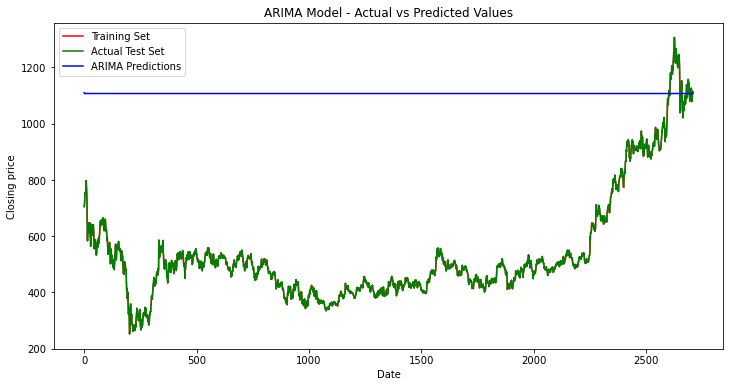

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Training Set', color='red')
plt.plot(test['Close'], label='Actual Test Set', color='green')
plt.plot(test.index, predictions, label='ARIMA Predictions', color='blue')

plt.title('ARIMA Model - Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [28]:
train1 = train['Close'].diff()

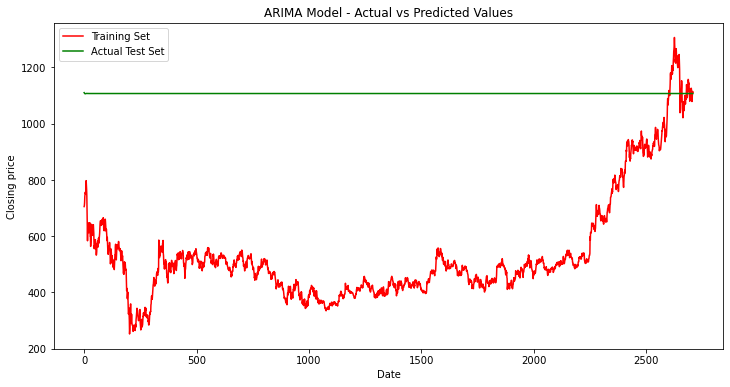

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(actual_values, label='Training Set', color='red')
plt.plot(predicted_values, label='Actual Test Set', color='green')
# plt.plot(test.index, predictions, label='ARIMA Predictions', color='blue')

plt.title('ARIMA Model - Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.show()

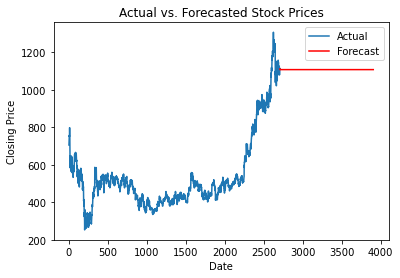

In [51]:
model = ARIMA(df['Close'], order=(2, 1, 2))  # Replace p and q with appropriate values
result = model.fit()

# Forecast future values
forecast = result.get_forecast(steps=1200)
plt.plot(test['Close'], label='Actual')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecasted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()